In [568]:
!pip install yellowbrick #instala a biblioteca que não vem padrão no jupyter ou Gcolab

In [569]:
import pandas as pd
import numpy as np

#importando a base de dados
base = pd.read_csv('./DF/dadosTREINO1_1_label.csv')
raw_data = base.values
#definindo previsores e class
classe  = raw_data[0:, -1] #ultima coluna
previsores = raw_data[0:, 0:78] #coluna zero até a penultima
#previsores = base.iloc[0:, 0:150].values
#classe = base.iloc[0:, -1].values
base

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78
0,68.528071,67.468247,63.718649,67.407128,64.252481,68.895338,69.239859,66.008631,63.694655,62.392486,...,65.126022,65.126022,65.126022,65.126022,65.126022,65.126022,65.126022,65.126022,65.126022,0
1,69.532310,69.541413,69.069931,69.432527,69.812304,72.273219,76.542790,77.368212,75.613407,72.355411,...,65.923672,65.923672,65.923672,65.923672,65.923672,65.923672,65.923672,65.923672,65.923672,0
2,75.059714,74.186772,74.281696,74.659208,78.278582,82.655410,82.097410,78.761359,75.241201,76.911257,...,69.459631,69.459631,69.459631,69.459631,69.459631,69.459631,69.459631,69.459631,69.459631,1
3,75.728333,75.428307,74.443246,72.285629,73.307299,74.694199,75.662541,75.412917,75.143155,74.816181,...,74.510300,74.510300,74.510300,74.510300,74.510300,74.510300,74.510300,74.510300,74.510300,0
4,81.401250,82.262868,85.140919,84.670541,81.343000,79.943382,79.656731,77.151601,75.601513,76.492690,...,78.858811,78.858811,78.858811,78.858811,78.858811,78.858811,78.858811,78.858811,78.858811,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,72.527974,73.115842,72.860565,72.723398,72.627218,71.406131,70.980793,70.101994,70.637222,70.947518,...,72.907830,72.907830,72.907830,72.907830,72.907830,72.907830,72.907830,72.907830,72.907830,1
109,74.556179,73.659447,73.366441,73.444961,73.074180,71.998635,71.339456,72.015497,72.469107,72.106291,...,73.924393,73.924393,73.924393,73.924393,73.924393,73.924393,73.924393,73.924393,73.924393,0
110,77.494000,74.273128,71.041667,74.492538,77.045814,79.026715,77.564407,73.880971,70.313741,68.386593,...,71.098098,71.098098,71.098098,71.098098,71.098098,71.098098,71.098098,71.098098,71.098098,0
111,58.918977,58.390375,58.125714,58.178006,58.449974,58.486508,58.389050,60.045588,60.823266,60.624816,...,58.923306,58.923306,58.923306,58.923306,58.923306,58.923306,58.923306,58.923306,58.923306,1


In [613]:
#importando diversos modelos 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score

scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

#Divisão da base de dados entre treinamento e teste
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=0)

#aqui eu comentava qual modelo não ia utilizar 
classificador = RandomForestClassifier(n_estimators=10, min_samples_leaf = 15, random_state= 0, n_jobs = -1, max_features = 'sqrt') 
#classificador = DecisionTreeClassifier(max_depth=6, min_samples_leaf = 25, random_state = 0)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)


#obtendo resultados 
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
roc = roc_auc_score(classe_teste, previsoes)
f1 = f1_score(classe_teste, previsoes)
print(precisao)
print(f1)
print(roc)

#matriz de confusão
from yellowbrick.classifier import ConfusionMatrix
classes = ['Verdadeiro','Falso']
cm = ConfusionMatrix(
    classificador, classes=classes,
    percent=True
)
cm.fit(previsores_treinamento, classe_treinamento)
cm.score(previsores_teste, classe_teste)
cm.show();

0.7586206896551724
0.631578947368421
0.7210526315789474


"from yellowbrick.classifier import ConfusionMatrix\nclasses = ['Verdadeiro','Falso']\ncm = ConfusionMatrix(\n    classificador, classes=classes,\n    percent=True\n)\ncm.fit(previsores_treinamento, classe_treinamento)\ncm.score(previsores_teste, classe_teste)\ncm.show();"

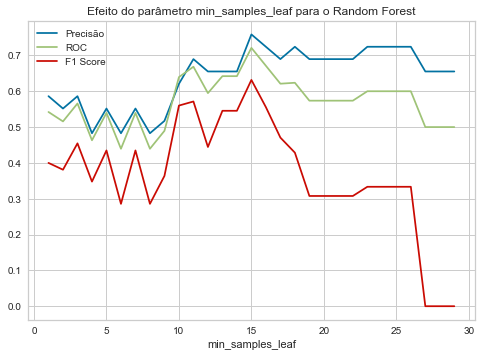

In [600]:
#obtendo os melhores chutes de parâmetros
vecprev = []
vecroc = []
vecf1 = []
amostra = []
for i in range(30):
    if i > 0:
        amostra.append(i)
        classificador = RandomForestClassifier(n_estimators=10, min_samples_leaf = i, random_state= 0, n_jobs = -1, max_features = 'sqrt') 
        #classificador = DecisionTreeClassifier(max_depth=6, min_samples_leaf = 10, random_state = 0)
        classificador.fit(previsores_treinamento, classe_treinamento)
        previsoes = classificador.predict(previsores_teste)

        precisao = accuracy_score(classe_teste, previsoes)
        matriz = confusion_matrix(classe_teste, previsoes)
        roc = roc_auc_score(classe_teste, previsoes)
        f1 = f1_score(classe_teste, previsoes)
        vecprev.append(precisao)
        vecroc.append(roc)
        vecf1.append(f1)
    

import matplotlib.pyplot as plt

plt.title("Efeito do parâmetro min_samples_leaf para o Random Forest")
plt.plot(amostra, vecprev, label="Precisão")
plt.plot(amostra, vecroc, label="ROC")
plt.plot(amostra, vecf1, label="F1 Score")
plt.xlabel("min_samples_leaf", rotation=0)
plt.legend()
#plt.savefig('mslRF.png', format='png')

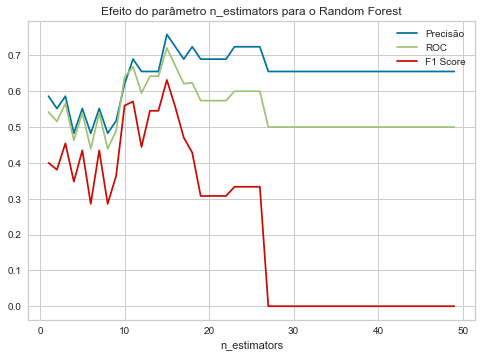

In [608]:
vecprev = []
vecroc = []
vecf1 = []
amostra = []
for i in range(50):
    if i > 0:
        amostra.append(i)
        classificador = RandomForestClassifier(n_estimators=10, min_samples_leaf = i, random_state= 0, n_jobs = -1, max_features = 'sqrt') 
        #classificador = DecisionTreeClassifier(max_depth=6, min_samples_leaf = 10, random_state = 0)
        classificador.fit(previsores_treinamento, classe_treinamento)
        previsoes = classificador.predict(previsores_teste)

        precisao = accuracy_score(classe_teste, previsoes)
        matriz = confusion_matrix(classe_teste, previsoes)
        roc = roc_auc_score(classe_teste, previsoes)
        f1 = f1_score(classe_teste, previsoes)
        vecprev.append(precisao)
        vecroc.append(roc)
        vecf1.append(f1)
    

import matplotlib.pyplot as plt

plt.title("Efeito do parâmetro n_estimators para o Random Forest")
plt.plot(amostra, vecprev, label="Precisão")
plt.plot(amostra, vecroc, label="ROC")
plt.plot(amostra, vecf1, label="F1 Score")
plt.xlabel("n_estimators", rotation=0)
plt.legend()
plt.savefig('nestlRF.png', format='png')

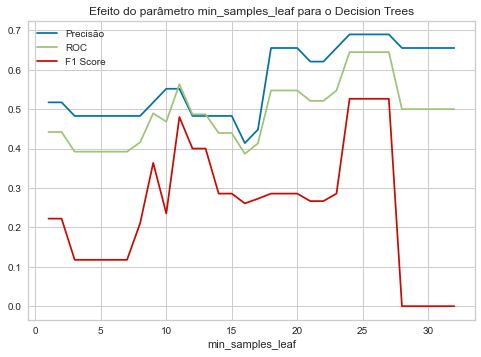

In [594]:
vecprev = []
vecroc = []
vecf1 = []
amostra = []
for i in range(33):
    if i > 0:
        amostra.append(i)
        #classificador = RandomForestClassifier(n_estimators=10, min_samples_leaf = i, random_state= 0, n_jobs = -1, max_features = 'sqrt') 
        classificador = DecisionTreeClassifier(max_depth=6, min_samples_leaf = i, random_state = 0)
        classificador.fit(previsores_treinamento, classe_treinamento)
        previsoes = classificador.predict(previsores_teste)

        precisao = accuracy_score(classe_teste, previsoes)
        matriz = confusion_matrix(classe_teste, previsoes)
        roc = roc_auc_score(classe_teste, previsoes)
        f1 = f1_score(classe_teste, previsoes)
        vecprev.append(precisao)
        vecroc.append(roc)
        vecf1.append(f1)
    

import matplotlib.pyplot as plt

plt.title("Efeito do parâmetro min_samples_leaf para o Decision Trees")
plt.plot(amostra, vecprev, label="Precisão")
plt.plot(amostra, vecroc, label="ROC")
plt.plot(amostra, vecf1, label="F1 Score")
plt.xlabel("min_samples_leaf", rotation=0)
plt.legend()
plt.savefig('msllDT.png', format='png')

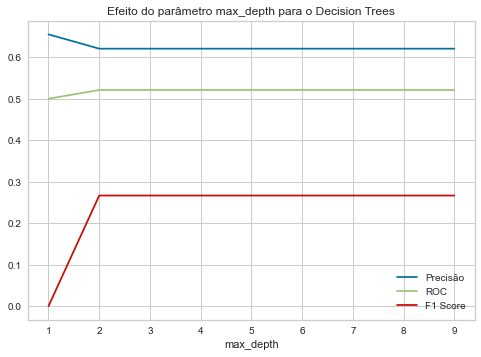

In [604]:
vecprev = []
vecroc = []
vecf1 = []
amostra = []
for i in range(10):
    if i > 0:
        amostra.append(i)
        #classificador = RandomForestClassifier(n_estimators=10, min_samples_leaf = i, random_state= 0, n_jobs = -1, max_features = 'sqrt') 
        classificador = DecisionTreeClassifier(max_depth=i, min_samples_leaf = 22, random_state = 0)
        classificador.fit(previsores_treinamento, classe_treinamento)
        previsoes = classificador.predict(previsores_teste)

        precisao = accuracy_score(classe_teste, previsoes)
        matriz = confusion_matrix(classe_teste, previsoes)
        roc = roc_auc_score(classe_teste, previsoes)
        f1 = f1_score(classe_teste, previsoes)
        vecprev.append(precisao)
        vecroc.append(roc)
        vecf1.append(f1)
    

import matplotlib.pyplot as plt

plt.title("Efeito do parâmetro max_depth para o Decision Trees")
plt.plot(amostra, vecprev, label="Precisão")
plt.plot(amostra, vecroc, label="ROC")
plt.plot(amostra, vecf1, label="F1 Score")
plt.xlabel("max_depth", rotation=0)
plt.legend()
plt.savefig('maxdepthDT.png', format='png')